In [ ]:
DATA ANALYSIS AND DATA SCIENCE WITH PYTHON 
Task 4: Regression Analysis

In [ ]:
1. Dataset Selection 
● Dataset Name: house_prices.csv 
● Key Columns: 
○ Size: Numeric (e.g., in square feet). 
○ Location: Categorical (e.g., urban, suburban, rural). 
○ Number of Rooms: Numeric. 
○ Price: Numeric (target variable).

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
# Load Dataset
df = pd.read_csv("C:/Users/Admin/Downloads/house_prices (1).csv")


In [7]:
df

,Size,Location,Number of Rooms,Price
0,3974,suburban,5,706640.104901
1,1660,suburban,2,197445.198514
2,2094,urban,2,305811.012697
3,1930,urban,2,512785.985300
4,1895,urban,5,177979.535785
...,...,...,...,...
495,1881,urban,3,338712.734832
496,1433,rural,4,160150.142387
497,1312,suburban,5,138070.575862
498,3649,suburban,5,352903.688285


In [14]:
# Inspect Dataset
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             500 non-null    int64  
 1   Location         500 non-null    object 
 2   Number of Rooms  500 non-null    int64  
 3   Price            500 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 15.8+ KB
None
              Size  Number of Rooms         Price
count   500.000000       500.000000  5.000000e+02
mean   2435.276000         3.490000  3.927519e+05
std     913.031599         1.108313  1.922637e+05
min     801.000000         2.000000  9.644459e+04
25%    1658.500000         2.750000  2.395381e+05
50%    2440.500000         4.000000  3.497154e+05
75%    3232.250000         4.000000  5.099435e+05
max    3991.000000         5.000000  1.044359e+06
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


In [16]:
# Handle missing values (if any)
df = df.dropna()

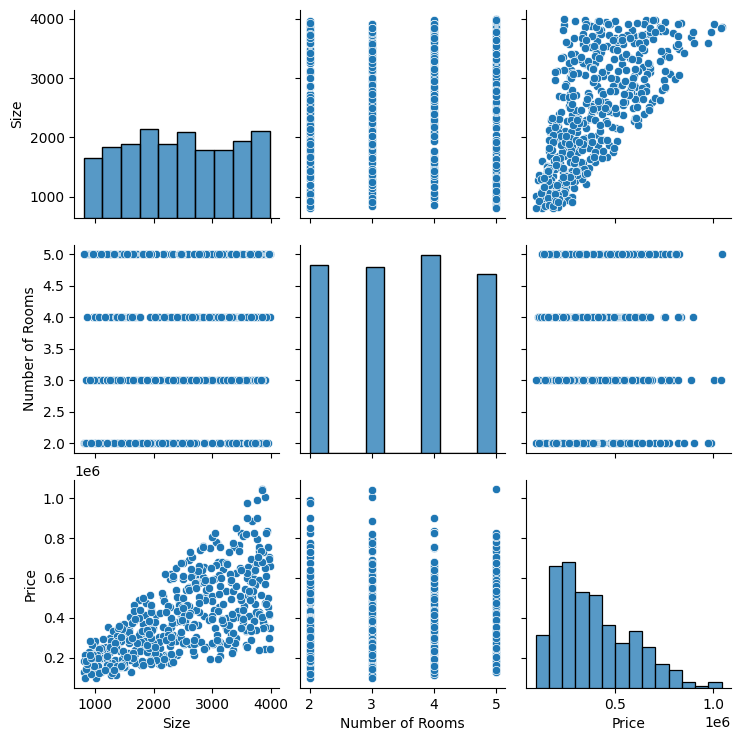

In [18]:
# Visualize distributions
sns.pairplot(df)
plt.show()


In [22]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number'])  

# Identify and remove outliers using IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]



In [24]:
# Define features and target
X = filtered_df[['Size', 'Location', 'Number of Rooms']]
y = filtered_df['Price']

In [28]:
# Preprocessing pipeline
numeric_features = ['Size', 'Number of Rooms']
categorical_features = ['Location']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [30]:
# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [48]:
# 5. Model Evaluation
# Make predictions
y_pred = model.predict(X_test)

In [44]:
import numpy as np 

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Root Mean Square Error (RMSE): 130939.01876427005
R² Score: 0.5174268284881406


In [42]:
# Feature importance
feature_names = numeric_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())
feature_importance = model.named_steps['regressor'].coef_
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
print(feature_df.sort_values(by='Importance', ascending=False))


             Feature     Importance
0               Size  117876.970707
4     Location_urban   56792.622269
1    Number of Rooms    5258.263406
3  Location_suburban    2491.304458
2     Location_rural  -59283.926726


In [46]:
# Feature Importance Analysis
print("Model Coefficients:", model.named_steps["regressor"].coef_)

Model Coefficients: [117876.97070712   5258.26340575 -59283.92672618   2491.30445753
  56792.62226865]
